# **Data Profiling**

## Objectives

* To profile the data using Pandas Profiling and run correlation analysis to find relevant variables for analysing further

## Inputs

* outputs/datasets/collection/data-melborne_f.csv

## Outputs

*  generate code that answers business requirement 1 




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Nod-to-the-COD'

# Load Data

Load data sheet

In [4]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets/collection/Data-Melbourne_F_fixed.csv")
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,date
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014-01-01
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014-01-02
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014-01-05
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014-01-06
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014-01-07


# Data Exploration

Dataset Overview with pandas_profiling

We use the ydata_profiling (formerly pandas_profiling) library to generate an interactive report for exploratory analysis of the dataset. This includes:
- Variable types and distributions
- Missing values
- Correlation matrices
- Warnings or data quality issues


In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

/tmp/ipykernel_24576/962869596.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 17/17 [00:00<00:00, 147.85it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Study

In [6]:
df['date'] = pd.to_datetime(df['date'])


In [7]:
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year


---

In [8]:
corr_spearman = df.corr(method='spearman')['Chemical Oxygen Demand'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

Total Nitrogen              0.766683
Biological Oxygen Demand    0.456210
Ammonia                     0.296885
year                        0.276204
date                        0.268945
Average humidity           -0.165520
Total rainfall             -0.159646
Maximum temperature         0.114882
Average Temperature         0.102299
Minimum temperature         0.069284
Name: Chemical Oxygen Demand, dtype: float64

In [9]:
corr_pearson = df.corr(method='pearson')['Chemical Oxygen Demand'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

Total Nitrogen              0.681225
Biological Oxygen Demand    0.524189
Ammonia                     0.284552
year                        0.231927
date                        0.227455
Average humidity           -0.152655
Maximum temperature         0.090018
Average Temperature         0.083946
Total rainfall             -0.055335
Minimum temperature         0.052716
Name: Chemical Oxygen Demand, dtype: float64

In [10]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'Ammonia', 'Biological Oxygen Demand', 'Total Nitrogen', 'date', 'year'}

We can see from the above data that there are 2 variables that show the most correlation to the COD level.
- Total Nitrogen, TN
- Biological Oxygen Demand, BOD


Now we want to run a heatmap analysis
The heatmap below shows pairwise correlations between numeric features in the dataset.

- Features with strong positive or negative correlation to COD may be important for prediction.
- This step helps identify multicollinearity and potential feature relationships.

The triangular mask makes the plot easier to read by hiding redundant mirrored values.

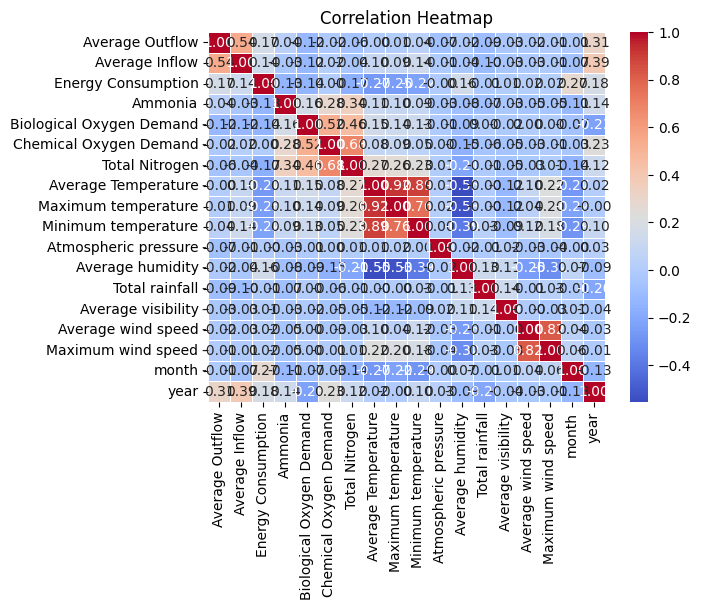

In [11]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


I want to be able to just look at the most relevant variables.

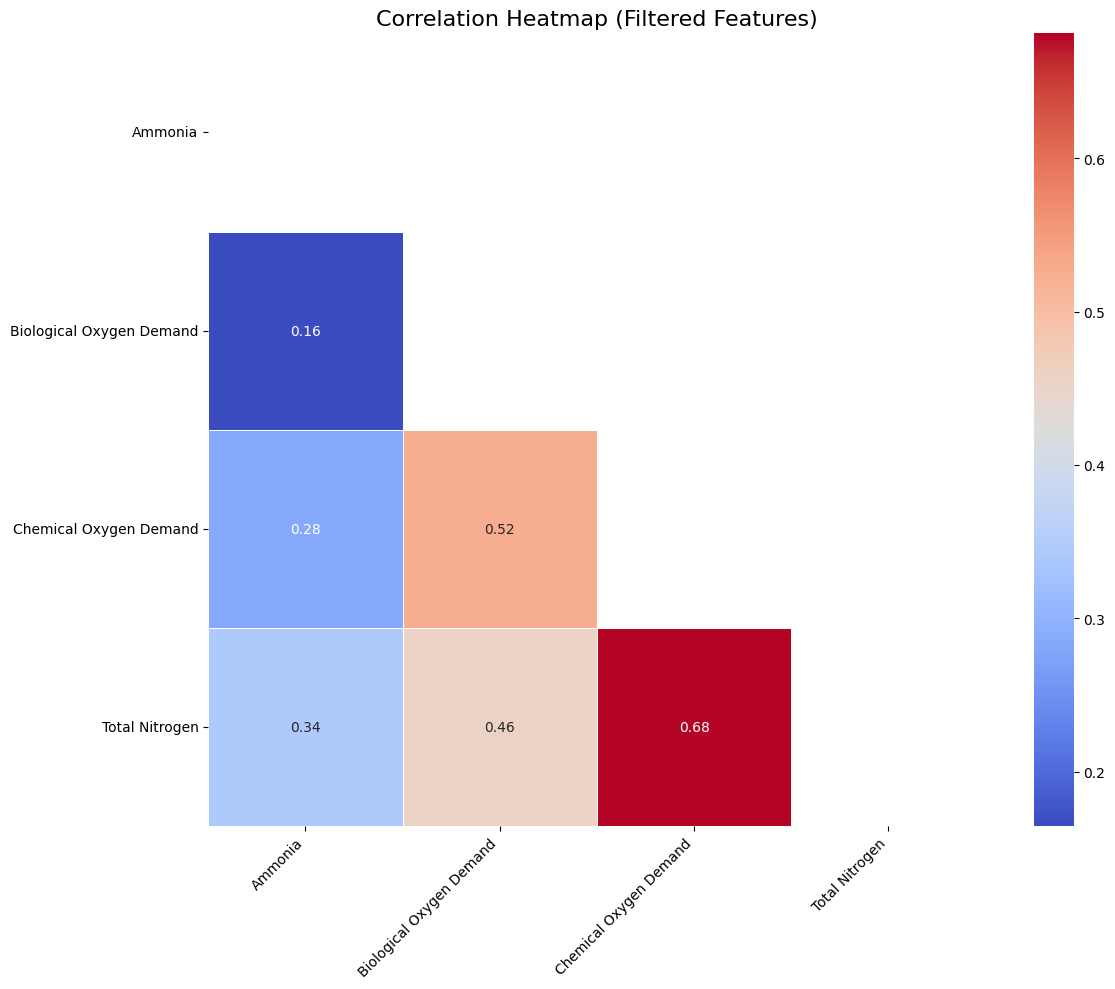

In [12]:
import numpy as np

# Filter to only relevant columns
relevant_cols = [
    'Ammonia', 'Biological Oxygen Demand', 'Chemical Oxygen Demand',
    'Total Nitrogen'
]

filtered_df = df[relevant_cols]

# Calculate correlation matrix
corr = filtered_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap with mask applied
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    mask=mask
)

plt.title('Correlation Heatmap (Filtered Features)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Visualisation in Streamlit Dashboard

The correlation heatmaps used for profiling are not saved as static images in this notebook.

Instead, they are dynamically generated and displayed within the interactive Streamlit dashboard, allowing users to explore feature relationships and select variables of interest in real time.

This approach:
- Keeps the notebook focused and streamlined
- Avoids redundant image files
- Supports interactive exploration through the app

👉 Refer to the **COD Trends & Analysis** page of the Streamlit app to view these visualisations.
